In [ ]:
#problem Statement 
#You own the mall and want to understand the customers like who can be easily converge
#[Target Customers] so that the sense can be given to marketing team and
#plan the strategy accordingly.

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
encoder = LabelEncoder()
data.Gender = encoder.fit_transform(data.Gender)

In [34]:
scaler = RobustScaler()
data = scaler.fit_transform(data)
data

array([[-1.        ,  1.        , -0.83950617, -1.2739726 , -0.2875817 ,
         1.        ],
       [-0.98994975,  1.        , -0.74074074, -1.2739726 ,  0.81045752,
        -0.5       ],
       [-0.9798995 ,  0.        , -0.79012346, -1.24657534, -1.1503268 ,
         1.        ],
       ...,
       [ 0.9798995 ,  1.        , -0.19753086,  1.76712329,  0.62745098,
        -1.        ],
       [ 0.98994975,  1.        , -0.19753086,  2.06849315, -0.83660131,
         0.5       ],
       [ 1.        ,  1.        , -0.2962963 ,  2.06849315,  0.8627451 ,
        -1.        ]])

In [60]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data)

In [61]:
x = pd.DataFrame(x_pca,columns=['PC1','PC2'])

In [62]:
x

,PC1,PC2
0,-109.383941,5.478454
1,-108.202857,-34.931765
2,-107.376292,37.840872
3,-106.007807,-30.562696
4,-104.980323,7.296747
...,...,...
195,111.652574,-27.964645
196,114.615358,24.017825
197,115.911505,-23.729967
198,120.939935,30.859889


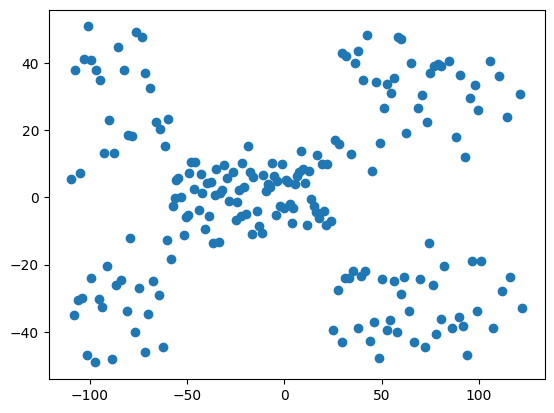

In [63]:
plt.scatter(x.PC1,x.PC2)

In [64]:
km = KMeans(n_clusters = 5 )
x_km = km.fit_predict(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
x_km

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [66]:
data['cluster'] = x_km 

In [67]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,1
197,198,1,32,126,74,3
198,199,1,32,137,18,1
